# MODULE 7 : UNSUPERVISED MACHINE LEARNING

# Task 2: Anomaly Detection using DBSCAN.

In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv('creditcard_2023.csv')
data

,CustomerID,Age,Gender,CreditLimit,Balance,MinPaymentDue,PaymentStatus,TotalTransactions,CreditUtilizationRate,Defaulted
0,C0001,56,Male,22044,12298,4235,On-time,50,0.56,0
1,C0002,69,Female,22732,2011,383,On-time,90,0.09,0
2,C0003,46,Female,18615,3373,248,On-time,23,0.18,0
3,C0004,32,Male,17132,10335,4683,Missed,80,0.60,1
4,C0005,60,Female,15178,7357,3242,On-time,95,0.48,0
...,...,...,...,...,...,...,...,...,...,...
1995,C1996,63,Female,20735,13647,6323,On-time,23,0.66,0
1996,C1997,67,Female,20830,11496,2512,On-time,90,0.55,0
1997,C1998,69,Female,20125,9549,1166,On-time,46,0.47,0
1998,C1999,24,Male,16905,15146,675,Late,53,0.90,1


In [45]:
data.shape

(2000, 10)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             2000 non-null   object 
 1   Age                    2000 non-null   int64  
 2   Gender                 2000 non-null   object 
 3   CreditLimit            2000 non-null   int64  
 4   Balance                2000 non-null   int64  
 5   MinPaymentDue          2000 non-null   int64  
 6   PaymentStatus          2000 non-null   object 
 7   TotalTransactions      2000 non-null   int64  
 8   CreditUtilizationRate  2000 non-null   float64
 9   Defaulted              2000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 156.4+ KB


In [47]:
data.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
CreditLimit              0
Balance                  0
MinPaymentDue            0
PaymentStatus            0
TotalTransactions        0
CreditUtilizationRate    0
Defaulted                0
dtype: int64

In [48]:
data.describe()

,Age,CreditLimit,Balance,MinPaymentDue,TotalTransactions,CreditUtilizationRate,Defaulted
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,43.805500,17592.463000,8754.318000,2201.478000,54.23050,0.495300,0.225000
std,14.929203,7270.481143,6670.423603,2345.898581,26.24225,0.292296,0.417687
min,18.000000,5024.000000,1.000000,50.000000,10.00000,0.000000,0.000000
25%,31.000000,11040.500000,3351.250000,485.750000,31.00000,0.230000,0.000000
50%,44.000000,17639.500000,7084.000000,1324.000000,54.00000,0.500000,0.000000
75%,56.000000,24002.750000,13158.250000,3072.250000,77.00000,0.750000,0.000000
max,69.000000,29995.000000,29062.000000,12971.000000,99.00000,1.000000,1.000000


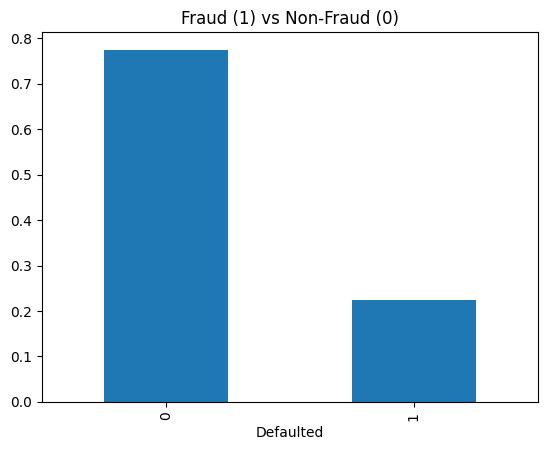

In [49]:
data['Defaulted'].value_counts(normalize=True).plot(kind='bar', title='Fraud (1) vs Non-Fraud (0)')
plt.show()

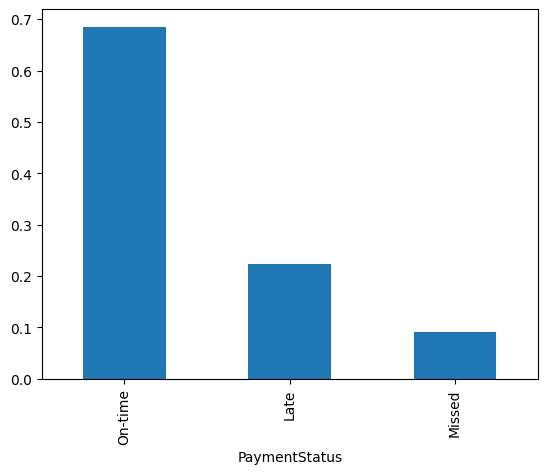

In [50]:
data['PaymentStatus'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [51]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'CreditLimit', 'Balance',
       'MinPaymentDue', 'PaymentStatus', 'TotalTransactions',
       'CreditUtilizationRate', 'Defaulted'],
      dtype='object')

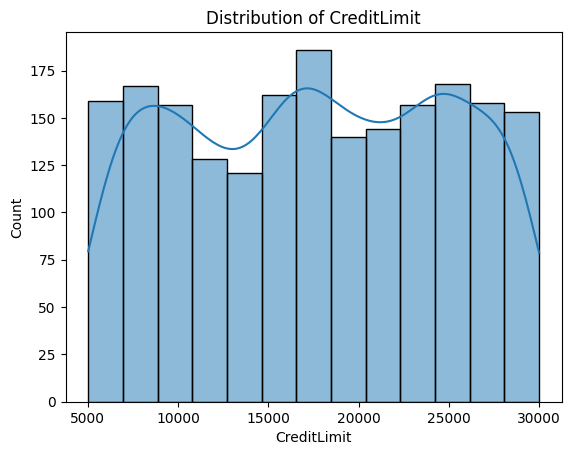

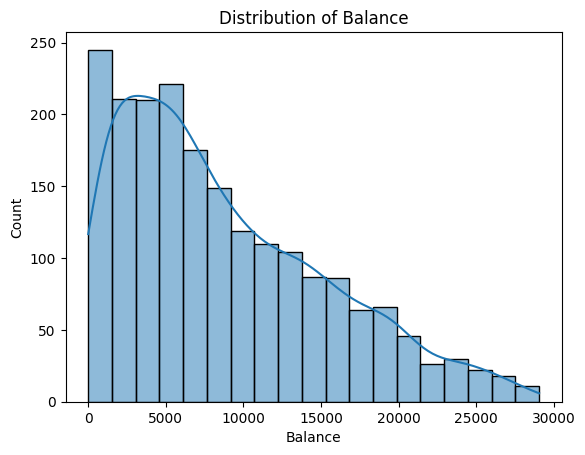

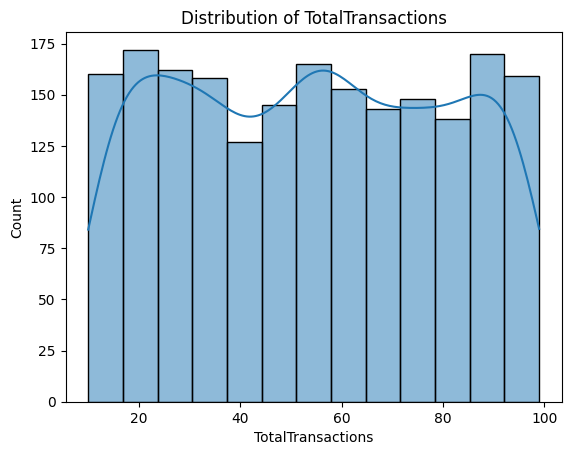

In [52]:
for col in ['CreditLimit', 'Balance', 'TotalTransactions']:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [53]:
le=LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [54]:
x=data.drop(columns=['Defaulted','CustomerID','PaymentStatus'])
y= data['Defaulted']

In [55]:
print(f"X-Shape : {x.shape}")
print(f"Y-Shape : {y.shape}")

X-Shape : (2000, 7)
Y-Shape : (2000,)


In [56]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [57]:
dbscan=DBSCAN(eps=1,min_samples=5)
labels = dbscan.fit_predict(x_scaled)

In [58]:
data['DBSCAN_Label'] = labels

In [59]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of anomalies (noise points): {n_noise}")


Estimated number of clusters: 12
Estimated number of anomalies (noise points): 112


In [60]:
if 'Defaulted' in data.columns:
    anomalies = data[data['DBSCAN_Label'] == -1]  
    frauds_in_anomalies = anomalies['Defaulted'].sum()  
    print(f"Defaulted customers among DBSCAN anomalies: {frauds_in_anomalies}")
    if len(anomalies) > 0:
        print(f"Anomaly precision (fraud among anomalies): {frauds_in_anomalies / len(anomalies):.2f}")


Defaulted customers among DBSCAN anomalies: 79
Anomaly precision (fraud among anomalies): 0.71


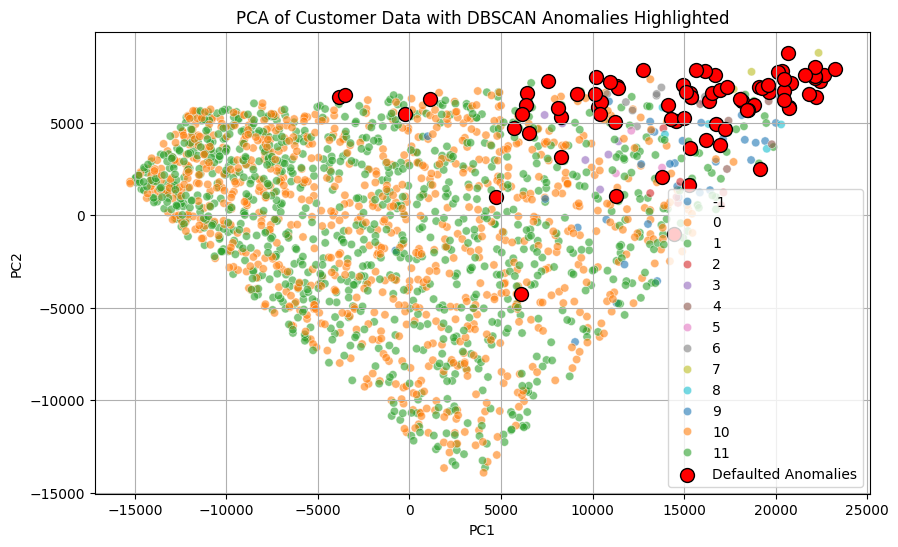

In [61]:
features = ['Age', 'CreditLimit', 'Balance', 'MinPaymentDue', 'TotalTransactions', 'CreditUtilizationRate']
X = data[features]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['DBSCAN_Label'] = data['DBSCAN_Label']
pca_df['Defaulted'] = data['Defaulted']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='DBSCAN_Label', palette='tab10', alpha=0.6)

anomalies = pca_df[pca_df['DBSCAN_Label'] == -1]
defaulted_anomalies = anomalies[anomalies['Defaulted'] == 1]
plt.scatter(defaulted_anomalies['PC1'], defaulted_anomalies['PC2'],
            color='red', s=100, label='Defaulted Anomalies', edgecolors='k')

plt.title('PCA of Customer Data with DBSCAN Anomalies Highlighted')
plt.legend()
plt.grid(True)
plt.show()
